<a href="https://colab.research.google.com/github/khodozzz/portfolio/blob/main/2_Countries_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import plotly.express as px

# Data Loading and Preproccesing

In [3]:
countries_df = pd.read_csv('Country_Dataset.csv')
countries_df

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


Extracting feature matrix X and country names

In [4]:
X = countries_df.drop(columns=['Country']).values
names = countries_df['Country']

Standardize the features

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Perform PCA

In [7]:
pca = PCA(n_components=3)
pca.fit(X_scaled.T)

print(pca.explained_variance_ratio_, '->', sum(pca.explained_variance_ratio_))

[0.49347507 0.18184637 0.14685152] -> 0.82217295694246


In [8]:
X_reduced = pca.components_.T

# Model Training and Evaluating

In [10]:
model = KMeans(n_init='auto')

Determine the optimal number of clusters using the Elbow method

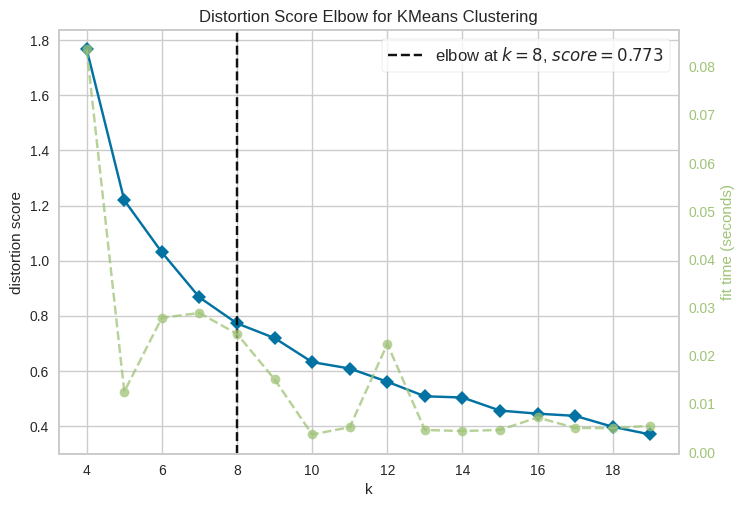

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
visualizer = KElbowVisualizer(model, k=(4,20))
visualizer.fit(X_reduced)        
visualizer.show()  

In [14]:
n_clusters = visualizer.elbow_value_

Perform K-means clustering with the optimal number of clusters

In [11]:
model = KMeans(n_init='auto', n_clusters=n_clusters)
model.fit(X_reduced)
labels = model.labels_

Create an interactive 3D scatter plot 

In [12]:
fig = px.scatter_3d(x=X_reduced[:, 0], 
                    y=X_reduced[:, 1], 
                    z=X_reduced[:, 2],
                    color=labels, 
                    hover_name=names)
# fig.write_html('clusters.html')
fig.show()

List all countries grouped by cluster

In [54]:
def output_words_in_segments(words, segment_length=128, sep=', '):
    current_line = [words[0]]

    for word in words[1:]:
        if sum(len(w) for w in current_line) + len(current_line) + len(word) <= segment_length:
            current_line.append(word)
        else:
            print(sep.join(current_line))
            current_line = [word]

    if current_line:
        print(sep.join(current_line))


In [55]:
for n_cluster in range(n_clusters):
    print(f'Cluster {n_cluster}: ')
    output_words_in_segments(names[labels == n_cluster].to_list())
    print()

Cluster 0: 
Antigua and Barbuda, Belgium, Belize, Bhutan, Botswana, Bulgaria, Cambodia, Cape Verde, Czech Republic, Estonia, Fiji, Guyana, Hungary
Ireland, Jordan, Kyrgyz Republic, Latvia, Lebanon, Lithuania, Macedonia, FYR, Maldives, Mauritius, Moldova, Montenegro, Morocco, Namibia
Panama, Paraguay, Samoa, Slovak Republic, Slovenia, St. Vincent and the Grenadines, Tonga, Tunisia, Ukraine, Vanuatu, Vietnam

Cluster 1: 
Algeria, Argentina, Azerbaijan, Bangladesh, Brunei, Egypt, Eritrea, Gabon, Indonesia, Iran, Kazakhstan, Kuwait, Mongolia, Myanmar, Nepal
Nigeria, Oman, Pakistan, Qatar, Russia, Saudi Arabia, Sri Lanka, Uzbekistan, Venezuela, Yemen

Cluster 2: 
Afghanistan, Benin, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Cote d'Ivoire, Gambia
Ghana, Guinea, Guinea-Bissau, Iraq, Kenya, Madagascar, Malawi, Mali, Mozambique, Niger, Rwanda, Senegal, Sierra Leone, South Africa, Sudan
Tajikistan, Tanzania, Timor-Leste, Uganda, Zambia

Cluster 3

# Interpretation of Results (ChatGPT)

* Cluster 0: Ecotourism and Cultural Diversity Cluster

This cluster comprises countries that emphasize ecotourism and cultural diversity as significant drivers of their economies. These countries have rich natural landscapes, diverse cultural heritage, and sustainable tourism practices. They prioritize preserving their unique environments and promoting cultural experiences for visitors.

* Cluster 1: Resource-Rich Nations and Political Complexity Cluster

This cluster consists of countries that possess abundant natural resources, particularly in the energy sector. These countries often face challenges related to the management and distribution of their resources, leading to complex political dynamics. They have varying degrees of political stability and face distinct socio-economic issues associated with resource-dependent economies.

* Cluster 2: Developing Agricultural Economies and Infrastructure Focus Cluster

This cluster comprises countries with economies primarily reliant on agriculture. These nations face challenges related to developing their agricultural sectors, improving infrastructure, and addressing issues such as food security. They are actively working towards enhancing their agricultural productivity and strengthening their infrastructure networks.

* Cluster 3: Advanced Economies and Global Influence Cluster

This cluster represents highly developed economies that hold significant global influence. These countries possess advanced industries, well-established healthcare systems, and stable political institutions. They are key players in the global economy and have substantial international diplomatic and economic influence.

* Cluster 4: Small High-Income Nations Cluster

This cluster consists of small nations with high-income levels and strong economic stability. These countries often serve as international financial centers, providing favorable business environments and high standards of living. Their compact size allows for efficient governance and strategic economic planning.

* Cluster 5: Diverse Economies and Cultural Vibrancy Cluster

This cluster includes countries with diverse economies characterized by a mix of industries such as tourism, manufacturing, agriculture, and services. These nations boast rich cultural heritage and vibrant societies. They exhibit varying political landscapes and have unique socio-economic challenges.

* Cluster 6: Economically and Infrastructurally Challenged Nations Cluster

This cluster comprises countries facing significant economic and infrastructural challenges. These nations struggle with low economic development, limited infrastructure, and high poverty rates. They are actively working towards improving their economies and enhancing their infrastructure to uplift their societies.

* Cluster 7: Resource-Driven Economies and Political Diversity Cluster

This cluster represents countries whose economies heavily rely on natural resources, such as oil, gas, or minerals. They exhibit diverse political landscapes and face unique challenges associated with managing resource wealth. These nations have varying levels of political stability and are characterized by their resource-driven economies.